<a href="https://colab.research.google.com/github/PauloLucena2022/Atividade-03-LLM-e-Estat-stica/blob/main/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3

In [40]:
import numpy as np
import matplotlib.pyplot as plt

## A

In [97]:
np.random.seed(120)

n10 = 10
n100 = 100
n1000 = 1000

In [98]:
# Simulação de 10 vezes

moeda_justa_10 = np.random.choice(['Coroa', 'Cara'], size = n10, p = [0.5, 0.5])
moeda90_10_10 = np.random.choice(['Coroa', 'Cara'], size = n10, p = [0.9, 0.1])
moeda49_49_002_10 = np.random.choice(['Coroa', 'Cara', 'Intermediário'], size = n10, p = [0.49, 0.49, 0.02])

In [99]:
# Simulação de 100 vezes

moeda_justa_100 = np.random.choice(['Coroa', 'Cara'], size = n100, p = [0.5, 0.5])
moeda90_10_100 = np.random.choice(['Coroa', 'Cara'], size = n100, p = [0.9, 0.1])
moeda49_49_002_100 = np.random.choice(['Coroa', 'Cara', 'Intermediário'], size = n100, p = [0.49, 0.49, 0.02])

In [100]:
# Simulação de 1000 vezes

moeda_justa_1000 = np.random.choice(['Coroa', 'Cara'], size = n1000, p = [0.5, 0.5])
moeda90_10_1000 = np.random.choice(['Coroa', 'Cara'], size = n1000, p = [0.9, 0.1])
moeda49_49_002_1000 = np.random.choice(['Coroa', 'Cara', 'Intermediário'], size = n1000, p = [0.49, 0.49, 0.02])

In [101]:
def surpresa(p):
  return -np.log2(p)
# ---------------------------------------------------
def surpresa_media(p):
  h = 0

  for probabilidade in p:
    h += probabilidade * surpresa(probabilidade)

  return h

In [102]:
# Surpresa Média - Valores Teóricos
p_50_50 = [0.5, 0.5]
p_90_10 = [0.9, 0.1]
p_49_49_2 = [0.49, 0.49, 0.02]

surpresa_media_teorico_50_50 = surpresa_media(p_50_50)
surpresa_media_teorico_90_10 = surpresa_media(p_90_10)
surpresa_media_teorico_49_49_2 = surpresa_media(p_49_49_2)

print(f'Surpresa Média de Moeda Justa: {surpresa_media_teorico_50_50}')
print(f'Surpresa Média de Moeda 90/10: {surpresa_media_teorico_90_10}')
print(f'Surpresa Média de Moeda 49/49/2: {surpresa_media_teorico_49_49_2}')

Surpresa Média de Moeda Justa: 1.0
Surpresa Média de Moeda 90/10: 0.4689955935892812
Surpresa Média de Moeda 49/49/2: 1.1214405425418206


In [103]:
def probabilidades_simulacoes(sample):
  valores, contagens = np.unique(sample, return_counts = True)
  return contagens / contagens.sum()
#---------------------------------------------------------------
def surpresa_media_simulacoes(sample):
  prob_simulacoes = probabilidades_simulacoes(sample)
  return surpresa_media(prob_simulacoes)

In [104]:
justa_10 = surpresa_media_simulacoes(moeda_justa_10)
justa_100 = surpresa_media_simulacoes(moeda_justa_100)
justa_1000 = surpresa_media_simulacoes(moeda_justa_1000)

m_90_10_10 = surpresa_media_simulacoes(moeda90_10_10)
m_90_10_100 = surpresa_media_simulacoes(moeda90_10_100)
m_90_10_1000 = surpresa_media_simulacoes(moeda90_10_1000)

m_49_49_2_10 = surpresa_media_simulacoes(moeda49_49_002_10)
m_49_49_2_100 = surpresa_media_simulacoes(moeda49_49_002_100)
m_49_49_2_1000 = surpresa_media_simulacoes(moeda49_49_002_1000)

In [105]:
resultados_justa = [surpresa_media_teorico_49_49_2,
                    justa_10,
                    justa_100,
                    justa_1000]

resultados_90_10 = [surpresa_media_teorico_90_10,
                    m_90_10_10,
                    m_90_10_100,
                    m_90_10_1000]

resultados_49_49_2 = [surpresa_media_teorico_49_49_2,
                      m_49_49_2_10,
                      m_49_49_2_100,
                      m_49_49_2_1000]

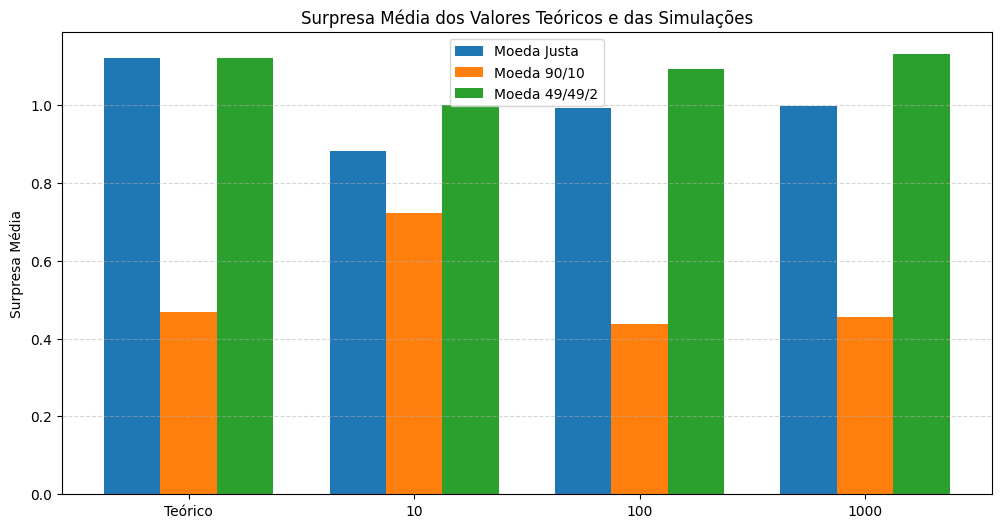

In [106]:
labels = ['Teórico', '10', '100', '1000']
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(12,6))

plt.bar(x - width, resultados_justa, width, label = 'Moeda Justa')
plt.bar(x, resultados_90_10, width, label = 'Moeda 90/10')
plt.bar(x + width, resultados_49_49_2, width, label = 'Moeda 49/49/2')

plt.xticks(x, labels)
plt.ylabel('Surpresa Média')
plt.title('Surpresa Média dos Valores Teóricos e das Simulações')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## B

In [111]:
def softmax(logits):
  exp_logits = np.exp(logits - np.max(logits))
  return exp_logits / np.sum(exp_logits, axis=-1, keepdims = True)
# ------------------------------------------------------------------
def cross_entropy_loss(probabilidades, labels_conhecidas):
  eps = 1e-15
  probabilidades = np.clip(probabilidades, eps, 1.0)

  loss = -np.sum(labels_conhecidas * np.log(probabilidades), axis = 1)
  return np.mean(loss)

In [113]:
labels_conhecidas = np.array(
    [[1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]])

np.random.seed(None)
logits_atuais = np.random.uniform(0.1, 3.0, size = (3,3))

In [115]:
iteracoes = 30
amostras = 4
desvio_padrao = 0.2

historico_entropia = []

for iteracao in range(iteracoes):
  candidatos = []
  entropias = []

  probabilidades = softmax(logits_atuais)
  entropia = cross_entropy_loss(probabilidades, labels_conhecidas)

  candidatos.append(logits_atuais)
  entropias.append(entropia)

  for _ in range (amostras):
    novo_logits = np.random.normal(loc = logits_atuais, scale = desvio_padrao)

    probabilidades_novo = softmax(novo_logits)
    entropia_novo = cross_entropy_loss(probabilidades_novo, labels_conhecidas)

    candidatos.append(novo_logits)
    entropias.append(entropia_novo)

  entropias = np.array(entropias)
  candidatos = np.array(candidatos)

  melhor_indice = np.argmin(entropias)

  logits_atuais = candidatos[melhor_indice]
  melhor_entropia = entropias[melhor_indice]

  historico_entropia.append(melhor_entropia)

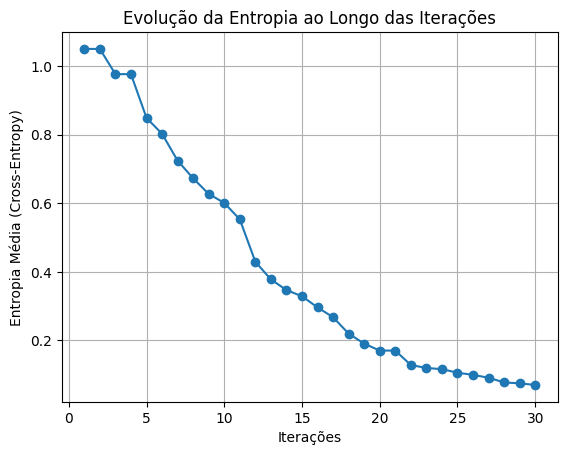

In [117]:
plt.plot(range(1, iteracoes + 1), historico_entropia, marker = 'o')
plt.xlabel('Iterações')
plt.ylabel('Entropia Média (Cross-Entropy)')
plt.title('Evolução da Entropia ao Longo das Iterações')
plt.grid(True)
plt.show()

## C